In [48]:
import tensorflow as tf
import numpy as np

p = 0.2
number_shots = 1000 
circuit_iter = 1
L = 12
depth = L-1 # samples will have depth = L-1 since they exclude very last layer containing final measurements
measurement_record_0 = np.load("../data/measurement_record_L_{}_p_{}_Q_{}_numbershots_{}_iter_{}.npy".format(L,p,0,number_shots,circuit_iter))
measurement_record_1 = np.load("../data/measurement_record_L_{}_p_{}_Q_{}_numbershots_{}_iter_{}.npy".format(L,p,1,number_shots,circuit_iter))
measurement_records = np.concatenate([measurement_record_0,measurement_record_1],axis=0)
num_meas_records_0 = len(measurement_record_0[:,0,0])
num_meas_records_1 = len(measurement_record_1[:,0,0])   
num_meas_records = num_meas_records_0+num_meas_records_1
charge_output_0 = np.zeros(num_meas_records_0)
charge_output_1 = np.ones(num_meas_records_1)
charge_output = np.concatenate([charge_output_0,charge_output_1],axis=0)
p = np.random.permutation(num_meas_records) 
data = measurement_records[p,:,:]
labels = charge_output[p]
test_percentage = 0.2 
train_percentage = 1 - test_percentage 
number_samples = len(measurement_records)
train_data_number_samples = round(train_percentage * number_samples)
train_data = data[0:train_data_number_samples,:,:]
train_labels = labels[0:train_data_number_samples]
test_data = data[train_data_number_samples:number_samples,:,:]
test_labels = labels[train_data_number_samples:number_samples]

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(depth, L)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

"""
# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32) 

# test the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)
"""
# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'loss'])

# Train the model with sample weights
history = model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model on some new data
test_loss, test_acc, test_train_loss = model.evaluate(test_data, test_labels, return_dict=True)['loss'], model.evaluate(test_data, test_labels, return_dict=True)['accuracy'], history.history['loss']
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
print('Training loss:', test_train_loss)


Epoch 1/10
100/100 [==============================] - 5s 5ms/step - loss: 0.6487 - accuracy: 0.6051
Epoch 2/10
100/100 [==============================] - 0s 5ms/step - loss: 0.5534 - accuracy: 0.7216
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5321 - accuracy: 0.7363
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5194 - accuracy: 0.7410
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5165 - accuracy: 0.7382
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5144 - accuracy: 0.7444
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7432
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5066 - accuracy: 0.7520
Epoch 9/10
100/100 [==============================] - 1s 5ms/step - loss: 0.5077 - accuracy: 0.7473
Epoch 10/10
25/25 [==============================] - 1s 2ms/step - loss: 0.5792 - accuracy: 0.7093
T

Text(0, 0.5, 'accuracy')

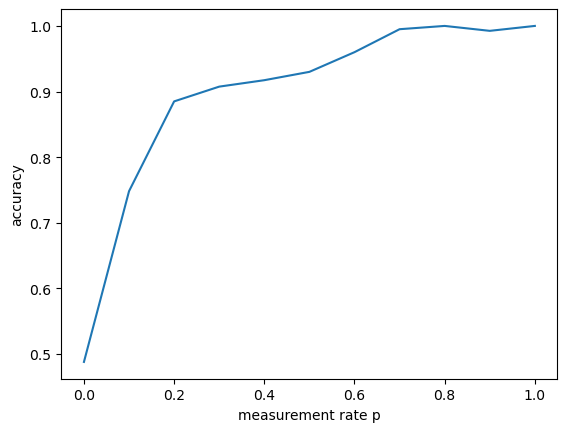

In [30]:
import matplotlib.pyplot as plt 
val_accuracy = [0.4880, 0.7482, 0.8850, 0.9075, 0.9173, 0.9300, 0.9600, 0.995, 1, 0.9925, 1]
# val_accuracy_0.5 = 0.8263
meas_probas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.plot(meas_probas, val_accuracy)
plt.xlabel('measurement rate p')
plt.ylabel('accuracy')